In [16]:
import h5py    
import numpy as np    
import pandas as pd
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value
import astropy.units as u
from astropy import constants as const
import matplotlib.pyplot as plt 


In [17]:
yrsec = (1*u.yr).to(u.s).value # 1 year in secs
solar_mass = const.M_sun.value #in Kgs
#hubble_time = (1/cosmo.H(0)).to(u.yr).value #Hubble time = 1/H0 
age_of_the_universe = cosmo.age(0).to(u.yr).value

In [18]:
#parent folder
pfolder = "/Users/pranavsatheesh/Triples/Github/"
import sys
sys.path.append(pfolder)

In [19]:
#binary merger files 
file_name = pfolder + "Illustris_Data/mbhb_data/new_fiducial_mbhb-evolution_with_env_in_ecc-evo-0.6_lc-shm06.hdf5"
f1 = h5py.File(file_name,'r') 

In [20]:
for grp in f1.keys():
    print("grp: ",grp)
    print(f1[grp].name)
    for a in f1[grp].attrs.keys():
        print(a)
    for k in f1[grp].keys():
        print("key: ", k)
        for a in f1[grp][k].attrs:
            print(a,": ",f1[grp][k].attrs[a])


grp:  envs
/envs
key:  SubhaloBHMass
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloBHMdot
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloCM
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloGasMetallicity
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloGrNr
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloHalfmassRad
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloHalfmassRadType
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloIDMostbound
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloLen
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloLenType
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloMass
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloMassInHalfRad
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloMassInHalfRadType
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloMassInMaxRad
desc :  see mbhb.envs
shape :  NA
units :  NA
key:  SubhaloMassI

In [21]:
eccenc = np.array(f1['evolution']['eccen'])

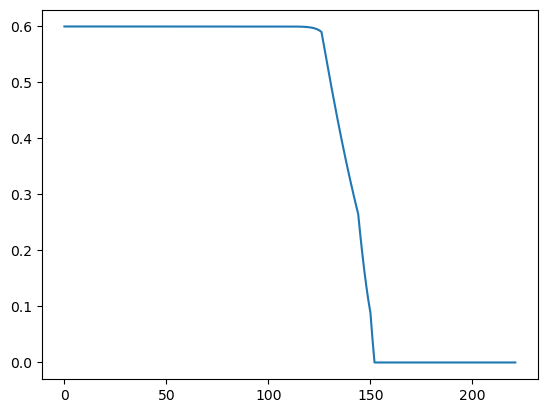

In [22]:
plt.plot(eccenc[0])

In [11]:
np.array(f1['evolution']['dedt'])

array([[-3.93380922e-39, -5.99574641e-39, -9.13846427e-39, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.31364050e-39, -2.00219555e-39, -3.05166217e-39, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.49264656e-40, -1.25993506e-39, -1.56798779e-39, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-7.68934664e-38, -1.17197785e-37, -1.78627930e-37, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.96179615e-41, -2.99008711e-41, -4.55736489e-41, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.42308661e-41, -2.16900870e-41, -3.20435543e-41, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [6]:
#binary merger files 
file_name = pfolder + "Illustris_Data/mbhb-evolution_no-ecc_lc-full-0.6.hdf5"
f1 = h5py.File(file_name,'r') 

Ms = np.array(f1['evolution']['masses'])
t = np.array(f1['evolution']['times'])
r = np.array(f1['evolution']['sep'])

Ms = Ms/(solar_mass*10**3)
Nbinary = len(Ms)
M1 = Ms[:,0]
M2 = Ms[:,1]

In [13]:


Share


You said:
In npz files can I store multidimensional arrays too ?
ChatGPT said:
ChatGPT
Yes, you can store multidimensional arrays in .npz files. An .npz file is a compressed archive of multiple numpy arrays stored in .npy format. You can save and load multidimensional arrays (such as 2D, 3D, or higher-dimensional arrays) using numpy functions like np.savez or np.savez_compressed and load them with np.load.

Here's an example:

Saving a multidimensional array:
python
Copy code
import numpy as np

# Creating a 3D array
arr = np.random.random((4, 3, 2))

# Saving it to an npz file
np.savez('multidimensional_array.npz', array_name=arr)
Loading the multidimensional array:
python
Copy code
loaded_data = np.load('multidimensional_array.npz')
loaded_array = loaded_data['array_name']

print(loaded_array)
You can store multiple arrays with different names in the same .npz file as well.






You said:
Which is better to save some object attributes (arrays) in file ?
ChatGPT said:
ChatGPT
The best method to save object attributes, especially if they are arrays (e.g., numpy arrays), depends on your specific needs for file size, readability, portability, and whether you need to save complex objects. Here are some common options:

1. .npz or .npy files (using Numpy)
Use case: Best for storing and loading numpy arrays quickly and efficiently.
Pros:
Handles large, multidimensional arrays well.
Easy to use if you're dealing primarily with numerical data.
.npz allows storing multiple arrays in one file.
Cons:
Not human-readable (binary format).
Limited to storing numpy arrays (other object types require conversion).
python
Copy code
# Saving arrays
np.savez('attributes.npz', attr1=obj.attr1, attr2=obj.attr2)

# Loading arrays
data = np.load('attributes.npz')
attr1 = data['attr1']
attr2 = data['attr2']
2. HDF5 format (using h5py)
Use case: Ideal for large datasets, multidimensional arrays, and hierarchical data.
Pros:
Efficient for large arrays and hierarchical data.
Allows partial loading of datasets (e.g., if the array is too large to fit into memory).
Cons:
Requires the h5py library.
Not as portable as simple text formats.
python
Copy code
import h5py

# Saving arrays
with h5py.File('attributes.h5', 'w') as f:
    f.create_dataset('attr1', data=obj.attr1)
    f.create_dataset('attr2', data=obj.attr2)

# Loading arrays
with h5py.File('attributes.h5', 'r') as f:
    attr1 = f['attr1'][:]
    attr2 = f['attr2'][:]
3. Pickle (using pickle)
Use case: For saving entire Python objects, including arrays, lists, dictionaries, and custom object attributes.
Pros:
Saves the entire Python object with all attributes, not just arrays.
Easy to use for complex objects with many attributes.
Cons:
Binary format (not human-readable).
Can be insecure when loading untrusted files (avoid loading pickle files from unknown sources).
python
Copy code
import pickle

# Saving the object
with open('object.pkl', 'wb') as f:
    pickle.dump(obj, f)

# Loading the object
with open('object.pkl', 'rb') as f:
    obj = pickle.load(f)
4. JSON (if arrays are small and simple)
Use case: Best for human-readable and portable storage, but limited to basic data types (e.g., lists and dictionaries).
Pros:
Human-readable and easy to share across platforms.
Supported by many languages.
Cons:
Doesn’t handle numpy arrays directly (need to convert to lists first).
Less efficient for large numerical data compared to .npz or HDF5.
python
Copy code
import json

# Converting arrays to lists and saving as JSON
with open('attributes.json', 'w') as f:
    json.dump({'attr1': obj.attr1.tolist(), 'attr2': obj.attr2.tolist()}, f)

# Loading from JSON
with open('attributes.json', 'r') as f:
    data = json.load(f)
    attr1 = np.array(data['attr1'])
    attr2 = np.array(data['attr2'])
Which is better?
For numpy arrays: .npz or HDF5 are the best options. They are efficient, simple to use with numpy arrays, and store large data well.
For complex objects with attributes: pickle is the easiest, as it can store the entire object directly.
For portability and human-readability: JSON can be useful, but it’s limited for numerical data.
If you're only saving numpy arrays as object attributes, go with .npz or HDF5, depending on the size and complexity of your data.






You said:

    def isolated_binaries_data(self,save_file):


        '''This function is for extracting all the info about isolated binaries and store them in
        a csv file'''
        masses_binary = self.masses[self.binary_mask]
        masses_binary = np.sort(masses_binary)
        M1_binary = masses_binary[:,1] #bigger one is primary
        M2_binary = masses_binary[:,0]
        qbh_inner = M2_binary/M1_binary
        mbh_t_form = self.sim_tmrg[self.binary_mask]

        t_evol_binary = self._next.evol_tmrg[self.binary_mask]
        #evolution time of binary in inspiral


        #gas-fraction, Escape speed and BHIDs
        fgas,Vescape,Phi_DM,Phi_star,M_halo,M_star,rhalf,sigma,rbulge = self.host_galaxy_properties()
        fgas = fgas[self.binary_mask]
        Vescape = Vescape[self.binary_mask]
        binary_ids = self.merger_ids[self.binary_mask]
        Phi_DM = Phi_DM[self.binary_mask]
        Phi_star = Phi_star[self.binary_mask]
        M_halo = M_halo[self.binary_mask]
        M_star = M_star[self.binary_mask]
        rhalf = rhalf[self.binary_mask]
        sigma = sigma[self.binary_mask]
        rbulge = rbulge[self.binary_mask]

        age_of_the_universe = cosmo.age(0).to(u.yr).value
        merged_before_z0_flag = []
        z_binary = []
    
        for time in t_evol_binary:
            if time >= age_of_the_universe:
                merged_before_z0_flag.append("No")
                z_binary.append(0)
            else:
                merged_before_z0_flag.append("Yes")
                z_binary.append(z_at_value(cosmo.age,(time/10**9)*u.Gyr,zmin=1e-13).value)

        #z_binary = z_at_value(cosmo.age,(t_evol_binary/10**9)*u.Gyr,zmin=1e-10)

        df = pd.DataFrame([M1_binary,M2_binary,qbh_inner,t_evol_binary,z_binary,mbh_t_form,merged_before_z0_flag,binary_ids[:,0],binary_ids[:,1],fgas,Vescape,Phi_DM,Phi_star,M_halo,M_star,rhalf,sigma,rbulge])
        df = df.transpose()
        df.columns = ['M1','M2','qin','t_merger','z_merger','t_form','merger_flag','bhid1','bhid2','f-gas','Vescape','Phi_DM','Phi_star','M_halo','M_star','rhalf','sigma','rbulge']
        df.to_csv(save_file+'iso_binaries_data_from_ill.csv',index=False)
        print("File saved at",save_file+"iso_binaries_data_from_ill.csv")

        return None

Can you rewrite this to store in hdf5 instead pf pandas
ChatGPT said:
ChatGPT
Sure! Here's the rewritten version of your code that stores the extracted information in an HDF5 file instead of using a CSV with pandas. The h5py library is used to handle the HDF5 file.

python
Copy code
import numpy as np
import h5py
from astropy.cosmology import z_at_value
from astropy import units as u

def isolated_binaries_data(self, save_file):
    '''This function extracts all the info about isolated binaries and stores them in an HDF5 file'''

    # Extracting binary masses and sorting them
    masses_binary = self.masses[self.binary_mask]
    masses_binary = np.sort(masses_binary)
    M1_binary = masses_binary[:, 1]  # Bigger one is primary
    M2_binary = masses_binary[:, 0]
    qbh_inner = M2_binary / M1_binary
    mbh_t_form = self.sim_tmrg[self.binary_mask]

    # Evolution time of binary in inspiral
    t_evol_binary = self._next.evol_tmrg[self.binary_mask]

    # Extract gas-fraction, escape speed, and other host galaxy properties
    fgas, Vescape, Phi_DM, Phi_star, M_halo, M_star, rhalf, sigma, rbulge = self.host_galaxy_properties()
    fgas = fgas[self.binary_mask]
    Vescape = Vescape[self.binary_mask]
    binary_ids = self.merger_ids[self.binary_mask]
    Phi_DM = Phi_DM[self.binary_mask]
    Phi_star = Phi_star[self.binary_mask]
    M_halo = M_halo[self.binary_mask]
    M_star = M_star[self.binary_mask]
    rhalf = rhalf[self.binary_mask]
    sigma = sigma[self.binary_mask]
    rbulge = rbulge[self.binary_mask]

    # Computing merger flag and redshift
    age_of_the_universe = cosmo.age(0).to(u.yr).value
    merged_before_z0_flag = []
    z_binary = []

    for time in t_evol_binary:
        if time >= age_of_the_universe:
            merged_before_z0_flag.append(0)  # No
            z_binary.append(0)
        else:
            merged_before_z0_flag.append(1)  # Yes
            z_binary.append(z_at_value(cosmo.age, (time / 10**9) * u.Gyr, zmin=1e-13).value)

    # Saving data to an HDF5 file
    with h5py.File(save_file + 'iso_binaries_data_from_ill.h5', 'w') as hf:
        hf.create_dataset('M1', data=M1_binary)
        hf.create_dataset('M2', data=M2_binary)
        hf.create_dataset('qin', data=qbh_inner)
        hf.create_dataset('t_merger', data=t_evol_binary)
        hf.create_dataset('z_merger', data=z_binary)
        hf.create_dataset('t_form', data=mbh_t_form)
        hf.create_dataset('merger_flag', data=merged_before_z0_flag)
        hf.create_dataset('bhid1', data=binary_ids[:, 0])
        hf.create_dataset('bhid2', data=binary_ids[:, 1])
        hf.create_dataset('f-gas', data=fgas)
        hf.create_dataset('Vescape', data=Vescape)
        hf.create_dataset('Phi_DM', data=Phi_DM)
        hf.create_dataset('Phi_star', data=Phi_star)
        hf.create_dataset('M_halo', data=M_halo)
        hf.create_dataset('M_star', data=M_star)
        hf.create_dataset('rhalf', data=rhalf)
        hf.create_dataset('sigma', data=sigma)
        hf.create_dataset('rbulge', data=rbulge)

    print("File saved at", save_file + "iso_binaries_data_from_ill.h5")

    return None
Key Changes:
Replaced the pandas DataFrame with h5py datasets.
Used hf.create_dataset() for each attribute (array) you want to store in the HDF5 file.
The merged flag (merged_before_z0_flag) is stored as a binary flag (0 for "No" and 1 for "Yes").
This format is efficient for large datasets, allowing you to store all arrays hierarchically in the HDF5 file.






You said:
Is there an easier way ?
ChatGPT said:
ChatGPT
Yes, an easier and more convenient way to store object attributes (like arrays) in an HDF5 file is to use the h5py library's ability to store dictionaries or even the higher-level pandas interface, which works well with HDF5.

However, if you want to avoid manually creating each dataset, you can streamline the process by writing a loop or saving the attributes as a group in HDF5. Here's an approach that simplifies things:

Approach 1: Using a loop with h5py
Instead of manually creating each dataset, you can place the arrays into a dictionary and loop through it to store the data in an HDF5 file. This reduces repetition in the code.

python
Copy code
import numpy as np
import h5py
from astropy.cosmology import z_at_value
from astropy import units as u

def isolated_binaries_data(self, save_file):
    '''This function extracts all the info about isolated binaries and stores them in an HDF5 file'''

    # Extracting binary masses and sorting them
    masses_binary = self.masses[self.binary_mask]
    masses_binary = np.sort(masses_binary)
    M1_binary = masses_binary[:, 1]  # Bigger one is primary
    M2_binary = masses_binary[:, 0]
    qbh_inner = M2_binary / M1_binary
    mbh_t_form = self.sim_tmrg[self.binary_mask]

    # Evolution time of binary in inspiral
    t_evol_binary = self._next.evol_tmrg[self.binary_mask]

    # Extract gas-fraction, escape speed, and other host galaxy properties
    fgas, Vescape, Phi_DM, Phi_star, M_halo, M_star, rhalf, sigma, rbulge = self.host_galaxy_properties()
    binary_ids = self.merger_ids[self.binary_mask]

    # Filter the values by the binary mask
    host_galaxy_data = {
        "fgas": fgas[self.binary_mask],
        "Vescape": Vescape[self.binary_mask],
        "Phi_DM": Phi_DM[self.binary_mask],
        "Phi_star": Phi_star[self.binary_mask],
        "M_halo": M_halo[self.binary_mask],
        "M_star": M_star[self.binary_mask],
        "rhalf": rhalf[self.binary_mask],
        "sigma": sigma[self.binary_mask],
        "rbulge": rbulge[self.binary_mask]
    }

    # Computing merger flag and redshift
    age_of_the_universe = cosmo.age(0).to(u.yr).value
    merged_before_z0_flag = []
    z_binary = []

    for time in t_evol_binary:
        if time >= age_of_the_universe:
            merged_before_z0_flag.append(0)  # No
            z_binary.append(0)
        else:
            merged_before_z0_flag.append(1)  # Yes
            z_binary.append(z_at_value(cosmo.age, (time / 10**9) * u.Gyr, zmin=1e-13).value)

    # Prepare data to store in a dictionary
    data_to_save = {
        'M1': M1_binary,
        'M2': M2_binary,
        'qin': qbh_inner,
        't_merger': t_evol_binary,
        'z_merger': z_binary,
        't_form': mbh_t_form,
        'merger_flag': merged_before_z0_flag,
        'bhid1': binary_ids[:, 0],
        'bhid2': binary_ids[:, 1],
        **host_galaxy_data  # unpack host galaxy properties into the dictionary
    }

    # Save all data using a loop
    with h5py.File(save_file + 'iso_binaries_data_from_ill.h5', 'w') as hf:
        for key, value in data_to_save.items():
            hf.create_dataset(key, data=value)

    print("File saved at", save_file + "iso_binaries_data_from_ill.h5")
    
    return None
Key Improvements:
Dictionary-based storage: We collect all the attributes into a data_to_save dictionary, which simplifies the process.
Loop: Instead of manually creating datasets for each attribute, we loop over the dictionary and create datasets in one go.
Dynamic inclusion: You can easily add or remove attributes from the dictionary without changing much of the code.
Approach 2: Using pandas with HDF5 (Optional)
If you're comfortable with using pandas, it can directly save the dataframe in HDF5 format, which is easy and more human-readable. This approach avoids h5py if you’re okay with pandas handling the HDF5 file.

python
Copy code
import pandas as pd
import numpy as np
from astropy.cosmology import z_at_value
from astropy import units as u

def isolated_binaries_data(self, save_file):
    '''This function extracts all the info about isolated binaries and stores them in an HDF5 file'''
    
    masses_binary = self.masses[self.binary_mask]
    masses_binary = np.sort(masses_binary)
    M1_binary = masses_binary[:, 1]
    M2_binary = masses_binary[:, 0]
    qbh_inner = M2_binary / M1_binary
    mbh_t_form = self.sim_tmrg[self.binary_mask]
    t_evol_binary = self._next.evol_tmrg[self.binary_mask]

    fgas, Vescape, Phi_DM, Phi_star, M_halo, M_star, rhalf, sigma, rbulge = self.host_galaxy_properties()
    fgas = fgas[self.binary_mask]
    Vescape = Vescape[self.binary_mask]
    binary_ids = self.merger_ids[self.binary_mask]
    Phi_DM = Phi_DM[self.binary_mask]
    Phi_star = Phi_star[self.binary_mask]
    M_halo = M_halo[self.binary_mask]
    M_star = M_star[self.binary_mask]
    rhalf = rhalf[self.binary_mask]
    sigma = sigma[self.binary_mask]
    rbulge = rbulge[self.binary_mask]

    age_of_the_universe = cosmo.age(0).to(u.yr).value
    merged_before_z0_flag = []
    z_binary = []

    for time in t_evol_binary:
        if time >= age_of_the_universe:
            merged_before_z0_flag.append("No")
            z_binary.append(0)
        else:
            merged_before_z0_flag.append("Yes")
            z_binary.append(z_at_value(cosmo.age, (time / 10**9) * u.Gyr, zmin=1e-13).value)

    # Create DataFrame
    df = pd.DataFrame({
        'M1': M1_binary,
        'M2': M2_binary,
        'qin': qbh_inner,
        't_merger': t_evol_binary,
        'z_merger': z_binary,
        't_form': mbh_t_form,
        'merger_flag': merged_before_z0_flag,
        'bhid1': binary_ids[:, 0],
        'bhid2': binary_ids[:, 1],
        'f-gas': fgas,
        'Vescape': Vescape,
        'Phi_DM': Phi_DM,
        'Phi_star': Phi_star,
        'M_halo': M_halo,
        'M_star': M_star,
        'rhalf': rhalf,
        'sigma': sigma,
        'rbulge': rbulge
    })

    # Save DataFrame to HDF5
    df.to_hdf(save_file + 'iso_binaries_data_from_ill.h5', key='iso_binaries', mode='w')

    print("File saved at", save_file + "iso_binaries_data_from_ill.h5")
    
    return None
Which Approach is Easier?
If you're comfortable with h5py and want more control over your data storage structure, Approach 1 with a loop is simpler and flexible.
If you prefer simplicity and are already using pandas, Approach 2 (pandas + HDF5) is the easiest, as it handles all the complexity for you while still using the HDF5 format.





You said:
Now I have a ndimensional array 
ChatGPT said:
ChatGPT
For multidimensional arrays, you can easily store them in both h5py and pandas with HDF5. Here's how you can adapt both approaches to handle an n-dimensional array.

Storing n-dimensional Arrays with h5py
In h5py, you can store any numpy array, including n-dimensional arrays, just as you would with 1D or 2D arrays. You don't need to change much from the previous code; h5py.create_dataset() naturally supports n-dimensional data.

Example for h5py:
python
Copy code
import numpy as np
import h5py

def save_nd_array_to_hdf5(nd_array, save_file):
    '''Function to save an n-dimensional array into an HDF5 file'''

    # Save the n-dimensional array
    with h5py.File(save_file + 'nd_array_data.h5', 'w') as hf:
        hf.create_dataset('nd_array', data=nd_array)

    print("N-dimensional array saved at", save_file + "nd_array_data.h5")

# Example usage
nd_array = np.random.rand(5, 4, 3)  # 3D array as an example
save_nd_array_to_hdf5(nd_array, "path_to_save/")
In this code:

The array nd_array is saved as a dataset in the HDF5 file.
You can replace nd_array with any n-dimensional array (3D, 4D, etc.), and h5py will handle it automatically.
Storing n-dimensional Arrays with pandas + HDF5
Pandas is great for 1D and 2D data, but if you need to store an n-dimensional array, it's best to stick with h5py directly since pandas doesn't natively support higher-dimensional structures beyond DataFrames.

However, if you're determined to use pandas, you could flatten your n-dimensional array into 2D (or reshape it) and then store it in HDF5. Here’s how you could do that:

python
Copy code
import numpy as np
import pandas as pd

def save_nd_array_with_pandas(nd_array, save_file):
    '''Function to save an n-dimensional array into HDF5 using pandas'''

    # Reshape the array into 2D (flatten if necessary)
    reshaped_array = nd_array.reshape(nd_array.shape[0], -1)
    
    # Create a DataFrame from the reshaped array
    df = pd.DataFrame(reshaped_array)

    # Save DataFrame to HDF5
    df.to_hdf(save_file + 'nd_array_data.h5', key='nd_array', mode='





You said:
in the previous function
ChatGPT said:
ChatGPT
To integrate n-dimensional array handling into your isolated_binaries_data function while saving the data in HDF5 format, you can follow these steps. Here’s the modified version that accommodates n-dimensional arrays:

Updated Function to Handle n-Dimensional Arrays
Assuming you want to include n-dimensional arrays among the attributes being saved, here’s how you can do it with h5py:

python
Copy code
import numpy as np
import h5py
from astropy.cosmology import z_at_value
from astropy import units as u

def isolated_binaries_data(self, save_file):
    '''This function extracts all the info about isolated binaries and stores them in an HDF5 file'''

    # Extracting binary masses and sorting them
    masses_binary = self.masses[self.binary_mask]
    masses_binary = np.sort(masses_binary)
    M1_binary = masses_binary[:, 1]  # Bigger one is primary
    M2_binary = masses_binary[:, 0]
    qbh_inner = M2_binary / M1_binary
    mbh_t_form = self.sim_tmrg[self.binary_mask]

    # Evolution time of binary in inspiral
    t_evol_binary = self._next.evol_tmrg[self.binary_mask]

    # Extract gas-fraction, escape speed, and other host galaxy properties
    fgas, Vescape, Phi_DM, Phi_star, M_halo, M_star, rhalf, sigma, rbulge = self.host_galaxy_properties()
    binary_ids = self.merger_ids[self.binary_mask]

    # Filter the values by the binary mask
    host_galaxy_data = {
        "fgas": fgas[self.binary_mask],
        "Vescape": Vescape[self.binary_mask],
        "Phi_DM": Phi_DM[self.binary_mask],
        "Phi_star": Phi_star[self.binary_mask],
        "M_halo": M_halo[self.binary_mask],
        "M_star": M_star[self.binary_mask],
        "rhalf": rhalf[self.binary_mask],
        "sigma": sigma[self.binary_mask],
        "rbulge": rbulge[self.binary_mask]
    }

    # Assuming you have an n-dimensional array to save
    n_dimensional_array = self.get_some_nd_array()  # Replace with your actual method to get the nD array

    # Computing merger flag and redshift
    age_of_the_universe = cosmo.age(0).to(u.yr).value
    merged_before_z0_flag = []
    z_binary = []

    for time in t_evol_binary:
        if time >= age_of_the_universe:
            merged_before_z0_flag.append(0)  # No
            z_binary.append(0)
        else:
            merged_before_z0_flag.append(1)  # Yes
            z_binary.append(z_at_value(cosmo.age, (time / 10**9) * u.Gyr, zmin=1e-13).value)

    # Prepare data to store in a dictionary
    data_to_save = {
        'M1': M1_binary,
        'M2': M2_binary,
        'qin': qbh_inner,
        't_merger': t_evol_binary,
        'z_merger': z_binary,
        't_form': mbh_t_form,
        'merger_flag': merged_before_z0_flag,
        'bhid1': binary_ids[:, 0],
        'bhid2': binary_ids[:, 1],
        **host_galaxy_data,  # Unpack host galaxy properties into the dictionary
        'n_dimensional_data': n_dimensional_array  # Add your n-dimensional array here
    }

    # Save all data using a loop
    with h5py.File(save_file + 'iso_binaries_data_from_ill.h5', 'w') as hf:
        for key, value in data_to_save.items():
            hf.create_dataset(key, data=value)

    print("File saved at", save_file + "iso_binaries_data_from_ill.h5")

    return None
Key Changes:
N-Dimensional Array: I added a placeholder method self.get_some_nd_array() that you should replace with your actual logic to retrieve the n-dimensional array you want to save.
Inclusion in Data to Save: The n-dimensional array is included in the data_to_save dictionary, just like the other attributes.
Saving the Data: All attributes, including the n-dimensional array, are saved using the loop that iterates over the dictionary.
Storing n-Dimensional Data:
The h5py.create_dataset() method handles n-dimensional data automatically, so you don't need to change anything else in the way you save datasets. Just ensure that the array you are passing to it is in the desired shape.

This will save all your attributes, including the n-dimensional array, into a single HDF5 file neatly organized with keys for each dataset.






You said:
what is **host_galaxy_data and how will I read that ?
ChatGPT said:
ChatGPT
The **host_galaxy_data syntax in Python is used to unpack a dictionary into a function call or another dictionary. In this context, host_galaxy_data is a dictionary containing various properties related to the host galaxy, such as gas fraction, escape speed, and other attributes.

Example Structure of host_galaxy_data
Here’s how host_galaxy_data is structured in your code:

python
Copy code
host_galaxy_data = {
    "fgas": fgas[self.binary_mask],
    "Vescape": Vescape[self.binary_mask],
    "Phi_DM": Phi_DM[self.binary_mask],
    "Phi_star": Phi_star[self.binary_mask],
    "M_halo": M_halo[self.binary_mask],
    "M_star": M_star[self.binary_mask],
    "rhalf": rhalf[self.binary_mask],
    "sigma": sigma[self.binary_mask],
    "rbulge": rbulge[self.binary_mask]
}
Reading the Data from HDF5
To read back the data you saved in the HDF5 file, including the host_galaxy_data, you can use the following approach with h5py:

python
Copy code
import h5py

def read_hdf5_data(file_path):
    '''Function to read data from the HDF5 file and return it as a dictionary'''

    data = {}
    
    with h5py.File(file_path, 'r') as hf:
        # Loop through each dataset in the file
        for key in hf.keys():
            data[key] = hf[key][...]  # Read the data into a NumPy array
    
    return data

# Example usage
file_path = 'path_to_save/iso_binaries_data_from_ill.h5'
data = read_hdf5_data(file_path)

# Accessing host galaxy data
fgas = data['fgas']
Vescape = data['Vescape']
Phi_DM = data['Phi_DM']
# ... and so on for other attributes
Breakdown of the Reading Process:
Opening the File: The h5py.File method opens the HDF5 file in read mode ('r').
Reading the Data: The hf.keys() method retrieves the names of all datasets (keys) in the file, which you can loop over. Each dataset can be accessed and loaded into memory using hf[key][...].
Storing in a Dictionary: Each dataset is stored in a dictionary called data, where the keys are the dataset names, and the values are the corresponding NumPy arrays.
Accessing Host Galaxy Data:
After reading the data, you can access the host galaxy data attributes using the keys you defined earlier. For example, you can retrieve fgas and other attributes as shown in the example.

This way, you can easily save and later retrieve complex data structures, including multidimensional arrays and dictionaries, from HDF5 files.






You said:
file_name = pfolder + "Illustris_Data/mbhb-evolution_no-ecc_lc-full-0.6.hdf5"
f1 = h5py.File(file_name,'r') 

print every key in f1
ChatGPT said:
ChatGPT
To print every key in your HDF5 file (f1), you can loop through the keys like this:

python
Copy code
import h5py

file_name = pfolder + "Illustris_Data/mbhb-evolution_no-ecc_lc-full-0.6.hdf5"
f1 = h5py.File(file_name, 'r')

# Print all keys in the HDF5 file
for key in f1.keys():
    print(key)
This will print every top-level key in the HDF5 file. If the file contains groups (like folders in a directory), each group can have its own sub-keys, which you can access recursively.

To print all keys, including those within groups, you can define a recursive function like this:

python
Copy code
def print_all_keys(hdf5_file, indent=0):
    for key in hdf5_file.keys():
        print(" " * indent + key)  # Indent for better readability
        if isinstance(hdf5_file[key], h5py.Group):
            print_all_keys(hdf5_file[key], indent + 2)  # Recursively print sub-keys

# Example usage:
print_all_keys(f1)
This will print all keys in the file, including nested groups and dataset

def print_hdf5_contents(hdf5_file, path='/', indent=0, limit=5):
    '''Recursively print the contents of an HDF5 file, including datasets and groups.'''
    for key in hdf5_file[path]:
        item = hdf5_file[path + key]
        
        if isinstance(item, h5py.Group):
            print(" " * indent + f"Group: {path + key}/")
            # Recursively print the contents of this group
            print_hdf5_contents(hdf5_file, path + key + '/', indent + 2)
        elif isinstance(item, h5py.Dataset):
            print(" " * indent + f"Dataset: {path + key}")
            # Print the dataset content with a limit to avoid excessive output
            data = item[...]
            if data.size > limit:
                print(" " * indent + f" Data (showing first {limit} elements):", data.flat[:limit])
            else:
                print(" " * indent + " Data:", data)

# Example usage
file_name = pfolder + "Illustris_Data/mbhb-evolution_no-ecc_lc-full-0.6.hdf5"
f1 = h5py.File(file_name, 'r')

# Print everything in the HDF5 file
print_hdf5_contents(f1)

KeyError: "Unable to open object (object 'envs' doesn't exist)"

In [11]:
# the merger is the maximum value in each time evolution of the binary

t_bin_merger = np.amax(t,1)/yrsec
merger = [] #to indicate if the binary actually merges before hubble time
z_binary = [] #convert the time of merger to redshifts

In [12]:
for time in t_bin_merger:
    if time >= age_of_the_universe:
        #these black holes aren't merging
        merger.append("No")
        z_binary.append(0)
    else:
        merger.append("Yes")
        z_binary.append(z_at_value(cosmo.age,(time/10**9)*u.Gyr,zmin=1e-9).value)

In [13]:
df = pd.DataFrame([M1,M2,t_bin_merger,merger,z_binary])
df = df.transpose()
df.columns = ['M1', 'M2', 't_merger','Merger','Redshift']

In [14]:
df.head()

,M1,M2,t_merger,Merger,Redshift
0,2261178.977273,1629005.681818,858774126.450153,Yes,6.459185
1,1614772.727273,1077349.431818,893400572.050411,Yes,6.265176
2,6554857.954545,1175723.011364,4120229485.36754,Yes,1.587945
3,7039616.477273,6263607.954545,89337138643.547943,No,0
4,11791392.045455,3306548.295455,14217143975.611784,No,0


In [15]:

#binary ids
mergers = np.load(pfolder+'Illustris_Data/ill-1_blackhole_mergers_fixed.npz')
indexes = f1['evolution']['val_inds'][:]
binary_ids = mergers['ids'][indexes]

In [16]:
Triple_df = pd.read_csv(pfolder+"Illustris_Data/triple_data_ill.csv") #the triples data file from find_triples
Triple_df.head()

,bhid1_bin_1,bhid2_bin_1,bhid1_bin_2,bhid2_bin_2,M1_bin_1,M2_bin_1,M1_bin_2,M2_bin_2,t1,t2,tmerger
0,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,3.286581e+07,1.253781e+07,5.276829e+07,8.204738e+06,2.055999e+09,1.988185e+09,1.985633e+09
1,9.223372e+18,9.223372e+18,3.402509e+18,9.223372e+18,1.059404e+07,2.885124e+06,3.132749e+08,4.211761e+07,3.255727e+11,7.265512e+09,5.529691e+09
2,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.655162e+07,6.537747e+06,7.257406e+07,4.653945e+07,5.274952e+10,1.032617e+10,3.025313e+09
3,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.259004e+07,3.439988e+06,2.386990e+07,2.216544e+06,5.883422e+09,1.284130e+12,1.972738e+09
4,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.325181e+08,1.408275e+07,4.551391e+08,1.002870e+06,1.206497e+10,7.389760e+09,4.814316e+09


In [17]:
np.max(Triple_df["M1_bin_1"])

13255795998.36437

In [18]:
bh1id1 = Triple_df["bhid1_bin_1"].to_numpy()
bh1id2 = Triple_df["bhid2_bin_1"].to_numpy()
bh2id1 = Triple_df["bhid1_bin_2"].to_numpy()
bh2id2 = Triple_df["bhid2_bin_2"].to_numpy()

In [131]:
def searchID(id):

    #to search if the binary ids belong to any triples, indicating a triple interaction

    tf1 = id in bh1id1
    tf2 = id in bh1id2
    tf3 = id in bh2id1
    tf4 = id in bh2id2

    tf = tf1 + tf2 + tf3 + tf4

    return tf 

merger_type = []

In [132]:
indices = []
for i in range(Nbinary):

    search1 = searchID(binary_ids[i][0])
    search2 = searchID(binary_ids[i][1])

    search = search1 + search2
    if(search == 0):
        merger_type.append("iso")
        
    else:
        merger_type.append("trip")
        indices.append(i)
       

df["Type"] = merger_type


In [133]:

binary_ids = np.array(binary_ids)
df["BH1-ID"] = binary_ids[:,0]
df["BH2-ID"] = binary_ids[:,1]

print("Number of Binaries: %d"%(len(df)))
print("Number of merged binaries: %d"%(len(df[df["Merger"]=="Yes"])))
print("Number of Isolated Binary mergers: %d"%(len(df[(df["Merger"]=="Yes") & (df["Type"] == "iso")])))
print("Number of Binaries with triple influence: %d"%(len(df[(df["Type"] == "trip")])))
print("Number of Binary non mergers with triple influence: %d"%(len(df[(df["Merger"]=="No") & (df["Type"] == "trip")])))

Number of Binaries: 9234
Number of merged binaries: 2370
Number of Isolated Binary mergers: 1929
Number of Binaries with triple influence: 1401
Number of Binary non mergers with triple influence: 960


In [135]:
df.to_csv("Data/binary-merger-data.csv",index = False)
print("saved")

saved


In [139]:
m1_list = []
m1_id = []
m2_list = []
m2_id = []
m3_list = []
m3_id = []

In [140]:
Ntriple = np.size(bh1id1)

In [149]:
ix_remove = []

for i in range(Ntriple):

    m1 = Triple_df["M1_bin_1"].iloc[i]
    m2 = Triple_df["M2_bin_1"].iloc[i]
    
    qin_old = m2/m1

    mA = Triple_df["M1_bin_2"].iloc[i]
    m3 = Triple_df["M2_bin_2"].iloc[i]

    dM = mA-(m1+m2)

    if(dM>0):
        m1_new = m1 + dM*(1-qin_old)
        m2_new = m2 + dM*qin_old

        if (m1_new>m2_new):
            m1_list.append(m1_new)
            m1_id.append(Triple_df["bhid1_bin_1"].iloc[i])
            m2_list.append(m2_new)
            m2_id.append(Triple_df["bhid2_bin_1"].iloc[i])
        
        else:
            m1_list.append(m2_new)
            m1_id.append(Triple_df["bhid2_bin_1"].iloc[i])
            m2_list.append(m1_new)
            m2_id.append(Triple_df["bhid1_bin_1"].iloc[i])
        
        m3_list.append(m3)
        m3_id.append(Triple_df["bhid1_bin_2"].iloc[i])
    
    else:
        ix_remove.append(i)
        

m1_list = np.array(m1_list)
m2_list = np.array(m2_list)
m3_list = np.array(m3_list)

m1_id = np.array(m1_id)
m2_id = np.array(m2_id)
m3_id = np.array(m3_id)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [142]:
Triple_df.iloc[ix_remove]

,bhid1_bin_1,bhid2_bin_1,bhid1_bin_2,bhid2_bin_2,M1_bin_1,M2_bin_1,M1_bin_2,M2_bin_2,t1,t2,tmerger
497,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,5.608023e+07,5.077300e+07,5.764539e+07,2.525074e+07,2.102321e+10,9.854869e+09,8.888190e+09
498,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.467121e+08,1.188970e+08,1.659010e+08,1.266006e+08,1.947578e+10,1.201756e+10,1.052584e+10
500,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.016216e+07,8.101857e+07,1.061407e+08,6.139939e+06,1.120306e+11,2.790481e+10,1.131227e+10


In [143]:
Triple_df

,bhid1_bin_1,bhid2_bin_1,bhid1_bin_2,bhid2_bin_2,M1_bin_1,M2_bin_1,M1_bin_2,M2_bin_2,t1,t2,tmerger
0,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,3.286581e+07,1.253781e+07,5.276829e+07,8.204738e+06,2.055999e+09,1.988185e+09,1.985633e+09
1,9.223372e+18,9.223372e+18,3.402509e+18,9.223372e+18,1.059404e+07,2.885124e+06,3.132749e+08,4.211761e+07,3.255727e+11,7.265512e+09,5.529691e+09
2,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.655162e+07,6.537747e+06,7.257406e+07,4.653945e+07,5.274952e+10,1.032617e+10,3.025313e+09
3,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.259004e+07,3.439988e+06,2.386990e+07,2.216544e+06,5.883422e+09,1.284130e+12,1.972738e+09
4,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.325181e+08,1.408275e+07,4.551391e+08,1.002870e+06,1.206497e+10,7.389760e+09,4.814316e+09
...,...,...,...,...,...,...,...,...,...,...,...
526,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,5.557129e+07,8.642577e+06,1.019236e+08,6.895766e+07,3.514319e+10,1.323119e+10,1.241580e+10
527,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,2.426127e+08,2.139748e+07,2.724291e+08,1.692168e+06,1.468992e+10,1.466670e+10,1.354208e+10
528,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,1.325318e+07,8.303175e+06,2.158876e+07,6.823273e+06,1.927055e+11,1.358702e+10,1.311330e+10
529,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,4.575134e+07,9.468752e+06,5.555056e+07,5.338969e+07,4.607816e+10,1.945157e+10,1.355722e+10


In [144]:
M1 = m1_list
qin = m2_list/m1_list
qout = m3_list/(m1_list + m2_list)

t_triple = Triple_df["tmerger"].to_numpy()
z_triple = z_at_value(cosmo.age,(t_triple/10**9)*u.Gyr,zmin=1e-10)
z_triple = np.array(z_triple)

In [145]:
t_triple = np.delete(t_triple,ix_remove)
z_triple = np.delete(z_triple,ix_remove)

In [146]:
column_name = ['M1','M2','M3','qin','qout','t_triple','z_triple','M1_ID','M2_ID','M3_ID']
Triple_df_mod = pd.DataFrame({'M1': M1,'M2':m2_list,'M3':m3_list,'qin': qin, 'qout': qout, 't_triple' : t_triple, 'z_triple' : z_triple,'M1_ID':m1_id,'M2_ID':m2_id,'M3_ID':m3_id},columns=column_name)

In [147]:
Triple_df_mod

,M1,M2,M3,qin,qout,t_triple,z_triple,M1_ID,M2_ID,M3_ID
0,3.742097e+07,1.534732e+07,8.204738e+06,0.410126,0.155486,1.985633e+09,3.257459,9.223372e+18,9.223372e+18,9.223372e+18
1,2.287451e+08,8.452986e+07,4.211761e+07,0.369537,0.134443,5.529691e+09,1.101818,9.223372e+18,9.223372e+18,3.402509e+18
2,4.649029e+07,2.608377e+07,4.653945e+07,0.561058,0.641268,3.025313e+09,2.201414,9.223372e+18,9.223372e+18,9.223372e+18
3,1.828782e+07,5.582083e+06,2.216544e+06,0.305235,0.092859,1.972738e+09,3.276165,9.223372e+18,9.223372e+18,9.223372e+18
4,4.082678e+08,4.687125e+07,1.002870e+06,0.114805,0.002203,4.814316e+09,1.320180,9.223372e+18,9.223372e+18,9.223372e+18
...,...,...,...,...,...,...,...,...,...,...
523,8.741631e+07,1.450728e+07,6.895766e+07,0.165956,0.676562,1.241580e+10,0.103086,9.223372e+18,9.223372e+18,9.223372e+18
524,2.502891e+08,2.214000e+07,1.692168e+06,0.088458,0.006211,1.354208e+10,0.016267,9.223372e+18,9.223372e+18,9.223372e+18
525,1.326529e+07,8.323477e+06,6.823273e+06,0.627463,0.316057,1.311330e+10,0.048085,9.223372e+18,9.223372e+18,9.223372e+18
526,4.601341e+07,9.537147e+06,5.338969e+07,0.207269,0.961101,1.355722e+10,0.015170,9.223372e+18,9.223372e+18,9.223372e+18


In [148]:
Triple_df_mod.to_csv('Data/Triple-mass-redshift.csv',index = False)